## Revenue change in Taxi, FHV, and Public Tranportation after the surcharges (based on the modeling results)

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Scaled_results_scenario1_mean.csv')
data = data.set_index('Unnamed: 0')
data1 = pd.read_csv('Scaled_results_scenario2_mean.csv')
#data1 = data1.drop(['Unnamed: 0'],axis=1)
data1 = data1.set_index('Unnamed: 0')
data2 = pd.read_csv('Scaled_results_scenario3_mean.csv')
data2 = data2.set_index('Unnamed: 0')
ground = pd.read_csv("final_acs_transportation_choice.csv")

In [3]:
ground.sum()

taxi_zone    3.259800e+04
P(mode1)     9.720936e+03
P(mode2)     1.475381e+04
P(mode3)     5.745300e+03
P(mode4)     1.756041e+06
P(mode5)     3.071924e+05
P(mode6)     7.865649e+05
dtype: float64

In [4]:
data.sum()

P(mode1)    9.720936e+03
P(mode2)    1.475381e+04
P(mode3)    5.745300e+03
P(mode4)    1.756041e+06
P(mode5)    3.071924e+05
P(mode6)    7.865649e+05
dtype: float64

In [5]:
#data1.drop('Unnamed: 0',axis=1,inplace=True)
data.sum().values

array([   9720.93564923,   14753.80678305,    5745.29989927,
       1756040.67350758,  307192.42033239,  786564.86382846])

In [6]:
data1.sum().values

array([   5793.67511666,   13985.03090014,    8367.04522448,
       1778084.35846292,  309131.65911234,  788131.67690658])

In [7]:
data2.sum().values

array([   3834.83576428,   13911.18615692,   12324.97394304,
       1900406.55335086,  310970.60402477,  724107.00218756])

In [8]:
data['pair'] = data.index
data['origin'] = data['pair'].str.rsplit("-", expand=True)[0].astype(int)
data['destination'] = data['pair'].str.rsplit("-", expand=True)[1].astype(int)
data2['pair'] = data2.index
data2['origin'] = data['pair'].str.rsplit("-", expand=True)[0].astype(int)
data2['destination'] = data['pair'].str.rsplit("-", expand=True)[1].astype(int)
data1['pair'] = data1.index
data1['origin'] = data['pair'].str.rsplit("-", expand=True)[0].astype(int)
data1['destination'] = data['pair'].str.rsplit("-", expand=True)[1].astype(int)

In [9]:
cleaned_data= pd.read_csv('final_allMode_with_2017wage_cleaned_update.csv')
taxi_price = cleaned_data[cleaned_data['mode']==1][['PUlocationID','DOlocationID','price']]
fhv_price = cleaned_data[cleaned_data['mode']==2][['PUlocationID','DOlocationID','price']]
fhv_s_price = cleaned_data[cleaned_data['mode']==3][['PUlocationID','DOlocationID','price']]
pt_price = cleaned_data[cleaned_data['mode']==4][['PUlocationID','DOlocationID','price']]
pv_price = cleaned_data[cleaned_data['mode']==6][['PUlocationID','DOlocationID','price']]

In [10]:
taxi = pd.DataFrame()
taxi['pickup']=data['origin']
taxi['dropoff']=data['destination']
taxi = taxi.merge(ground[['P(mode1)','taxi_zone']], left_on='pickup', right_on = 'taxi_zone', how='outer')
taxi = taxi.merge(data[['origin','destination','P(mode1)']], 
          left_on=['pickup','dropoff'], right_on = ['origin','destination'])
taxi.rename(columns = {'P(mode1)_x': 'ground_choice', 'P(mode1)_y': 'model result with no fee'},inplace=True)
#taxi
taxi = taxi.merge(data1[['origin','destination','P(mode1)']], 
          left_on=['pickup','dropoff'], right_on = ['origin','destination'])
taxi = taxi.merge(data2[['origin','destination','P(mode1)']], 
          left_on=['pickup','dropoff'], right_on = ['origin','destination'])
taxi = taxi.merge(taxi_price[['PUlocationID','DOlocationID','price']], 
          left_on=['pickup','dropoff'], right_on = ['PUlocationID','DOlocationID'])
taxi = taxi.drop(['taxi_zone','PUlocationID','DOlocationID','origin_x','destination_x','origin_y',
           'destination_y','origin','destination'], axis=1)
taxi.rename(columns = {'P(mode1)_x':'model result with $2.75', 'P(mode1)_y': 'model result with $10'},inplace=True)
taxi_revenue = pd.DataFrame()
#taxi_revenue['groud_total_revenue'] = taxi['ground_choice']*taxi['price']
taxi_revenue['no fee total_revenue'] = taxi['model result with no fee']*taxi['price']
#taxi_revenue['$2.75 baseline_revenue'] = taxi['model result with no fee']*(taxi['price']+2.75)
#taxi_revenue['$10 baseline_revenue'] = taxi['model result with no fee']*(taxi['price']+10)
taxi_revenue['$2.75 total_revenue'] = taxi['model result with $2.75']*taxi['price']
taxi_revenue['$10 total_revenue'] = taxi['model result with $10']*taxi['price']
taxi_revenue.head(10)

,no fee total_revenue,$2.75 total_revenue,$10 total_revenue
0,0.000000e+00,0.000000e+00,0.000000e+00
1,0.000000e+00,0.000000e+00,0.000000e+00
2,3.389826e-08,3.394376e-08,3.395210e-08
3,0.000000e+00,0.000000e+00,0.000000e+00
4,0.000000e+00,0.000000e+00,0.000000e+00
5,0.000000e+00,0.000000e+00,0.000000e+00
6,0.000000e+00,0.000000e+00,0.000000e+00
7,0.000000e+00,0.000000e+00,0.000000e+00
8,0.000000e+00,0.000000e+00,0.000000e+00
9,0.000000e+00,0.000000e+00,0.000000e+00


In [11]:
revenue_change = pd.DataFrame(taxi_revenue.sum()).T
revenue_change['revenue change from no fee to $2.75'] = revenue_change['$2.75 total_revenue']-revenue_change['no fee total_revenue']
revenue_change['revenue change from  2.75 to 10']= revenue_change['$10 total_revenue']- revenue_change['$2.75 total_revenue']
revenue_change['revenue change from no fee to $10']= revenue_change['$10 total_revenue'] - revenue_change['no fee total_revenue']
revenue_change = revenue_change.T
revenue_change.rename(columns = {0:'Taxi'},inplace=True)

In [12]:
fhv = pd.DataFrame()
fhv ['pickup']=data['origin']
fhv ['dropoff']=data['destination']
fhv  = fhv .merge(ground[['P(mode2)','taxi_zone']], left_on='pickup', right_on = 'taxi_zone', how='outer')
fhv  = fhv .merge(data[['origin','destination','P(mode2)']], 
          left_on=['pickup','dropoff'], right_on = ['origin','destination'])
fhv .rename(columns = {'P(mode2)_x': 'ground_choice', 'P(mode2)_y': 'model result with no fee'}, inplace=True)
fhv  = fhv .merge(data1[['origin','destination','P(mode2)']], 
          left_on=['pickup','dropoff'], right_on = ['origin','destination'])
fhv  = fhv .merge(data2[['origin','destination','P(mode2)']], 
          left_on=['pickup','dropoff'], right_on = ['origin','destination'])
fhv  = fhv .merge(fhv_price[['PUlocationID','DOlocationID','price']], 
          left_on=['pickup','dropoff'], right_on = ['PUlocationID','DOlocationID'])
fhv  = fhv.drop(['taxi_zone','PUlocationID','DOlocationID','origin_x','destination_x','origin_y',
           'destination_y','origin','destination'], axis=1)
fhv.rename(columns = {'P(mode2)_x':'model result with $2.75', 'P(mode2)_y': 'model result with $10'},inplace=True)
fhv_revenue = pd.DataFrame()
#taxi_revenue['groud_total_revenue'] = taxi['ground_choice']*taxi['price']
fhv_revenue['no fee total_revenue'] = fhv['model result with no fee']*fhv['price']
#taxi_revenue['$2.75 baseline_revenue'] = taxi['model result with no fee']*(taxi['price']+2.75)
#taxi_revenue['$10 baseline_revenue'] = taxi['model result with no fee']*(taxi['price']+10)
fhv_revenue['$2.75 total_revenue'] = fhv['model result with $2.75']*fhv['price']
fhv_revenue['$10 total_revenue'] = fhv['model result with $10']*fhv['price']
#fhv_revenue.head(10)


In [13]:
fhv_revenue = pd.DataFrame(fhv_revenue.sum()).T
fhv_revenue['revenue change from no fee to $2.75'] =  fhv_revenue['$2.75 total_revenue']-fhv_revenue['no fee total_revenue']
fhv_revenue['revenue change from  2.75 to 10']= (fhv_revenue['$10 total_revenue']- fhv_revenue['$2.75 total_revenue'])
fhv_revenue['revenue change from no fee to $10']= fhv_revenue['$10 total_revenue']- fhv_revenue['no fee total_revenue']
revenue_change['FHV']= fhv_revenue.T[0]
#revenue_change
revenue_change

,Taxi,FHV
no fee total_revenue,75436.866707,140769.781332
$2.75 total_revenue,41845.779611,131163.775330
$10 total_revenue,27197.833848,130253.348814
revenue change from no fee to $2.75,-33591.087096,-9606.006002
revenue change from 2.75 to 10,-14647.945763,-910.426516
revenue change from no fee to $10,-48239.032858,-10516.432519


In [14]:
fhv_s = pd.DataFrame()
fhv_s['pickup']=data['origin']
fhv_s ['dropoff']=data['destination']
fhv_s= fhv_s.merge(ground[['P(mode3)','taxi_zone']], left_on='pickup', right_on = 'taxi_zone', how='outer')
fhv_s = fhv_s.merge(data[['origin','destination','P(mode3)']], 
          left_on=['pickup','dropoff'], right_on = ['origin','destination'])
fhv_s.rename(columns = {'P(mode3)_x': 'ground_choice', 'P(mode3)_y': 'model result with no fee'}, inplace = True)
fhv_s= fhv_s.merge(data1[['origin','destination','P(mode3)']], 
          left_on=['pickup','dropoff'], right_on = ['origin','destination'])
fhv_s= fhv_s.merge(data2[['origin','destination','P(mode3)']], 
          left_on=['pickup','dropoff'], right_on = ['origin','destination'])
fhv_s= fhv_s.merge(fhv_s_price[['PUlocationID','DOlocationID','price']], 
          left_on=['pickup','dropoff'], right_on = ['PUlocationID','DOlocationID'])
fhv_s= fhv_s.drop(['taxi_zone','PUlocationID','DOlocationID','origin_x','destination_x','origin_y',
           'destination_y','origin','destination'], axis=1)
fhv_s.rename(columns = {'P(mode3)_x':'model result with $2.75', 'P(mode3)_y': 'model result with $10'}, inplace = True)
fhv_s_revenue = pd.DataFrame()
#taxi_revenue['groud_total_revenue'] = taxi['ground_choice']*taxi['price']
fhv_s_revenue['no fee total_revenue'] = fhv_s['model result with no fee']*fhv_s['price']
#taxi_revenue['$2.75 baseline_revenue'] = taxi['model result with no fee']*(taxi['price']+2.75)
#taxi_revenue['$10 baseline_revenue'] = taxi['model result with no fee']*(taxi['price']+10)
fhv_s_revenue['$2.75 total_revenue'] = fhv_s['model result with $2.75']*fhv_s['price']
fhv_s_revenue['$10 total_revenue'] = fhv_s['model result with $10']*fhv_s['price']
fhv_s_revenue = pd.DataFrame(fhv_s_revenue.sum()).T
fhv_s_revenue['revenue change from no fee to $2.75'] =  fhv_s_revenue['$2.75 total_revenue']-fhv_s_revenue['no fee total_revenue']
fhv_s_revenue['revenue change from  2.75 to 10']= fhv_s_revenue['$10 total_revenue']- fhv_s_revenue['$2.75 total_revenue']
fhv_s_revenue['revenue change from no fee to $10']= fhv_s_revenue['$10 total_revenue']- fhv_s_revenue['no fee total_revenue']
revenue_change['FHV_shared']= fhv_s_revenue.T[0]
revenue_change['FHV_total']= revenue_change['FHV']+revenue_change['FHV_shared']
#revenue_change

In [15]:
public_trans = pd.DataFrame()
public_trans['pickup']=data['origin']
public_trans['dropoff']=data['destination']
public_trans= public_trans.merge(ground[['P(mode4)','taxi_zone']], left_on='pickup', right_on = 'taxi_zone', how='outer')
public_trans = public_trans.merge(data[['origin','destination','P(mode4)']], 
          left_on=['pickup','dropoff'], right_on = ['origin','destination'])
public_trans.rename(columns = {'P(mode4)_x': 'ground_choice', 'P(mode4)_y': 'model result with no fee'}, inplace =True)
public_trans= public_trans.merge(data1[['origin','destination','P(mode4)']], 
          left_on=['pickup','dropoff'], right_on = ['origin','destination'])
public_trans= public_trans.merge(data2[['origin','destination','P(mode4)']], 
          left_on=['pickup','dropoff'], right_on = ['origin','destination'])
public_trans= public_trans.merge(pt_price[['PUlocationID','DOlocationID','price']], 
          left_on=['pickup','dropoff'], right_on = ['PUlocationID','DOlocationID'])
public_trans= public_trans.drop(['taxi_zone','PUlocationID','DOlocationID','origin_x','destination_x','origin_y',
           'destination_y','origin','destination'], axis=1)
public_trans.rename(columns = {'P(mode4)_x':'model result with $2.75', 'P(mode4)_y': 'model result with $10'}, inplace =True)
public_trans_revenue = pd.DataFrame()
#taxi_revenue['groud_total_revenue'] = taxi['ground_choice']*taxi['price']
public_trans_revenue['no fee total_revenue'] = public_trans['model result with no fee']*public_trans['price']
#taxi_revenue['$2.75 baseline_revenue'] = taxi['model result with no fee']*(taxi['price']+2.75)
#taxi_revenue['$10 baseline_revenue'] = taxi['model result with no fee']*(taxi['price']+10)
public_trans_revenue['$2.75 total_revenue'] = public_trans['model result with $2.75']*public_trans['price']
public_trans_revenue['$10 total_revenue'] = public_trans['model result with $10']*public_trans['price']
public_trans_revenue = pd.DataFrame(public_trans_revenue.sum()).T
public_trans_revenue['revenue change from no fee to $2.75'] =public_trans_revenue['$2.75 total_revenue']-public_trans_revenue['no fee total_revenue']
public_trans_revenue['revenue change from  2.75 to 10']= public_trans_revenue['$10 total_revenue']- public_trans_revenue['$2.75 total_revenue']
public_trans_revenue['revenue change from no fee to $10']= public_trans_revenue['$10 total_revenue']- public_trans_revenue['no fee total_revenue']
revenue_change['Public Transportation']= public_trans_revenue.T[0]
revenue_change

,Taxi,FHV,FHV_shared,FHV_total,Public Transportation
no fee total_revenue,75436.866707,140769.781332,52950.747416,193720.528748,7.525120e+06
$2.75 total_revenue,41845.779611,131163.775330,78509.436375,209673.211704,7.597451e+06
$10 total_revenue,27197.833848,130253.348814,118914.867417,249168.216231,8.148456e+06
revenue change from no fee to $2.75,-33591.087096,-9606.006002,25558.688959,15952.682956,7.233069e+04
revenue change from 2.75 to 10,-14647.945763,-910.426516,40405.431042,39495.004526,5.510051e+05
revenue change from no fee to $10,-48239.032858,-10516.432519,65964.120001,55447.687482,6.233358e+05


In [16]:
private = pd.DataFrame()
private['pickup']=data['origin']
private['dropoff']=data['destination']
private = private.merge(ground[['P(mode6)','taxi_zone']], left_on='pickup', right_on = 'taxi_zone', how='outer')
private = private.merge(data[['origin','destination','P(mode6)']], 
          left_on=['pickup','dropoff'], right_on = ['origin','destination'])
private.rename(columns = {'P(mode6)_x': 'ground_choice', 'P(mode6)_y': 'model result with no fee'}, inplace =True)
private = private.merge(data1[['origin','destination','P(mode6)']], 
          left_on=['pickup','dropoff'], right_on = ['origin','destination'])
private = private.merge(data2[['origin','destination','P(mode6)']], 
          left_on=['pickup','dropoff'], right_on = ['origin','destination'])
private= private.merge(pt_price[['PUlocationID','DOlocationID','price']], 
          left_on=['pickup','dropoff'], right_on = ['PUlocationID','DOlocationID'])
private= private.drop(['taxi_zone','PUlocationID','DOlocationID','origin_x','destination_x','origin_y',
           'destination_y','origin','destination'], axis=1)
private.rename(columns = {'P(mode6)_x':'model result with $2.75', 'P(mode6)_y': 'model result with $10'}, inplace =True)
privates_revenue = pd.DataFrame()
privates_revenue['no fee total_revenue'] = private['model result with no fee']*private['price']
#taxi_revenue['$2.75 baseline_revenue'] = taxi['model result with no fee']*(taxi['price']+2.75)
#taxi_revenue['$10 baseline_revenue'] = taxi['model result with no fee']*(taxi['price']+10)
privates_revenue['$2.75 total_revenue'] = private['model result with $2.75']*private['price']
privates_revenue['$10 total_revenue'] = private['model result with $10']*private['price']
privates_revenue = pd.DataFrame(privates_revenue.sum()).T
privates_revenue['revenue change from no fee to $2.75'] =privates_revenue['$2.75 total_revenue']-privates_revenue['no fee total_revenue']
privates_revenue['revenue change from  2.75 to 10']= privates_revenue['$10 total_revenue']- privates_revenue['$2.75 total_revenue']
privates_revenue['revenue change from no fee to $10']= privates_revenue['$10 total_revenue']- privates_revenue['no fee total_revenue']
revenue_change['Private vehicles']= privates_revenue.T[0]
revenue_change

,Taxi,FHV,FHV_shared,FHV_total,Public Transportation,Private vehicles
no fee total_revenue,75436.866707,140769.781332,52950.747416,193720.528748,7.525120e+06,4.350869e+06
$2.75 total_revenue,41845.779611,131163.775330,78509.436375,209673.211704,7.597451e+06,4.356784e+06
$10 total_revenue,27197.833848,130253.348814,118914.867417,249168.216231,8.148456e+06,4.059811e+06
revenue change from no fee to $2.75,-33591.087096,-9606.006002,25558.688959,15952.682956,7.233069e+04,5.914814e+03
revenue change from 2.75 to 10,-14647.945763,-910.426516,40405.431042,39495.004526,5.510051e+05,-2.969736e+05
revenue change from no fee to $10,-48239.032858,-10516.432519,65964.120001,55447.687482,6.233358e+05,-2.910588e+05


In [17]:
revenue_change.to_csv('revenue_change.csv')

Populating the interactive namespace from numpy and matplotlib


/anaconda3/envs/py3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


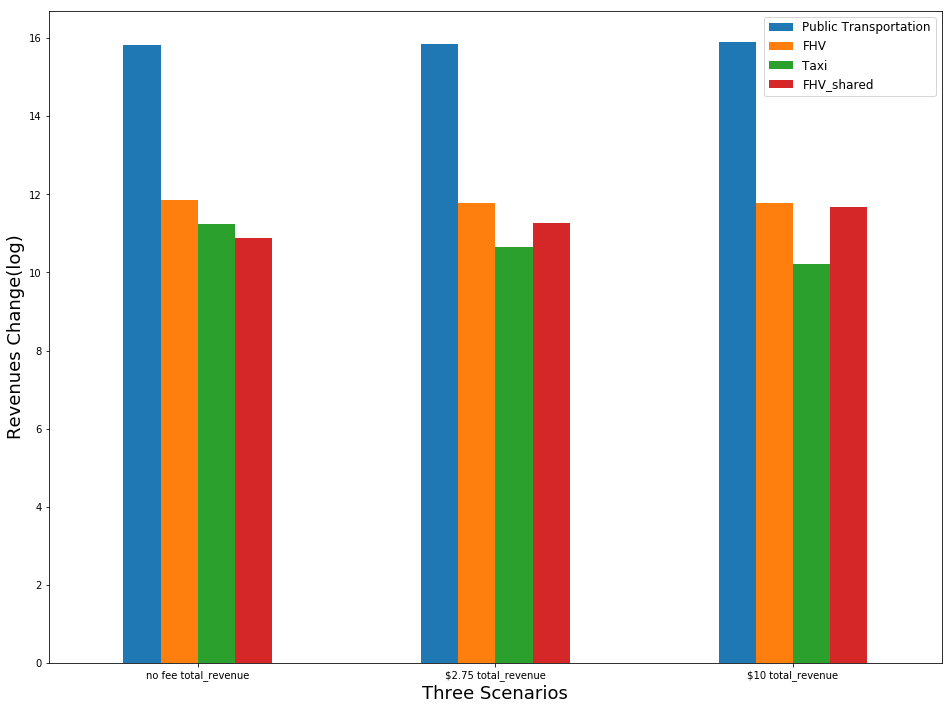

In [18]:
import matplotlib.pylab as plt
import numpy as np
%pylab inline
rev = revenue_change.drop(['FHV_total'],axis=1).iloc[:3]
rev = np.log(rev)
#rev = rev.iloc[:3]

rev = rev[['Public Transportation','FHV','Taxi','FHV_shared']]
# rev

rev.plot(kind='bar',figsize=(16,12), rot=0)
plt.ylabel("Revenues Change(log)",fontsize=18)
plt.xlabel("Three Scenarios",fontsize=18)
plt.legend(fontsize=12)
plt.savefig('Revenues change in 3 scenarios', edgecolor='w',
        orientation='portrait', transparent=False)
plt.show()

## Tax Revenue

In [19]:
zones_2_75 = [140,141, 237, 236, 263, 262, 43, 238, 239, 143,142, 12, 88, 261, 13, 87,
              209, 231, 45, 232, 148, 144, 211, 125, 158,  249, 114, 113, 79, 4, 224, 107, 234, 90, 68,
              246, 186, 164, 100, 170, 137, 233, 162, 161, 230, 48, 50, 163, 229]
zones_10 = [12, 88, 261, 13, 87, 209, 231, 45, 232, 148, 144, 211, 125, 158,  249, 114,
            113, 79, 4, 224, 107, 234, 90, 68, 246, 186, 164, 100, 170, 137, 233, 162, 161, 230, 48, 50, 163, 229]

In [20]:
population_2_75 = data1[data1['origin'].isin(zones_2_75)|data1['destination'].isin(zones_2_75)]
population_2_75 = pd.DataFrame(population_2_75.sum()).T
population_2_75_total_rev = population_2_75['P(mode1)']*2 + population_2_75['P(mode2)']*2.75+population_2_75['P(mode3)']*.5
population_2_75_total_rev

0    9657.71
dtype: object

In [21]:
population_10 = data2[data2['origin'].isin(zones_10) | data2['destination'].isin(zones_10)]
population_10 = pd.DataFrame(population_10.sum()).T
population_10_total_rev = population_10['P(mode1)']*7.27 + population_10['P(mode2)']*10+population_10['P(mode3)']*2.33+population_10['P(mode6)']*10
population_10_total_rev

0    575980
dtype: object

In [22]:
population_10['P(mode1)']*7.27 + population_10['P(mode2)']*10+population_10['P(mode3)']*2.33+population_10['P(mode6)']*10

0    575980
dtype: object

In [23]:
population_10

,P(mode1),P(mode2),P(mode3),P(mode4),P(mode5),P(mode6),pair,origin,destination
0,199.105,9.13853e-06,10164.3,1.45624e+06,143006,55085,10-10010-10710-11310-11410-1210-12510-1310-137...,2111533,2151437


In [24]:
population_2_75

,P(mode1),P(mode2),P(mode3),P(mode4),P(mode5),P(mode6),pair,origin,destination
0,3141.17,76.6142,6329.34,1.46088e+06,161957,153069,10-10010-10710-11310-11410-1210-12510-1310-137...,2782843,2823726


In [25]:
population_2_75['P(mode1)'] + population_2_75['P(mode2)']+population_2_75['P(mode3)']

0    9547.13
dtype: object

In [26]:
baseline_2_75 = data[data['origin'].isin(zones_2_75) | data['destination'].isin(zones_2_75)]
baseline_2_75 = pd.DataFrame(baseline_2_75.sum()).T
baseline_2_75_total_rev = baseline_2_75['P(mode1)']*2 + baseline_2_75['P(mode2)']*2.75+baseline_2_75['P(mode3)']*.5
baseline_2_75_total_rev

0    18330.9
dtype: object

In [27]:
baseline_10 = data[data['origin'].isin(zones_10) | data['destination'].isin(zones_10)]
baseline_10 = pd.DataFrame(baseline_10.sum()).T
baseline_10_total_rev = baseline_10['P(mode1)']*7.27 + baseline_10['P(mode2)']*10+baseline_10['P(mode3)']*2.73+baseline_10['P(mode6)']*10
baseline_10_total_rev

0    1.23792e+06
dtype: object

In [28]:
tax_revenue = pd.DataFrame()

In [29]:
tax_revenue['Baseline revenue - $2.75'] = baseline_2_75_total_rev
tax_revenue['revenue after mode shift - $2.75'] = population_2_75_total_rev
tax_revenue['Baseline revenue - $10'] = baseline_10_total_rev
tax_revenue['revenue after mode shift -  $10'] = population_10_total_rev
#tax_revenue.T.rename(columns = {0:'Tax Revenue'},inplace = T).T
tax_revenue = tax_revenue.T
tax_revenue.rename(columns = {0:'Tax Revenue'},inplace = True)
tax_revenue = tax_revenue.T
tax_revenue

,Baseline revenue - $2.75,revenue after mode shift - $2.75,Baseline revenue - $10,revenue after mode shift - $10
Tax Revenue,18330.9,9657.71,1.23792e+06,575980


In [30]:
tax_revenue.to_csv('tax.csv')

# Change in Ridership

## From No surcharge to $2.75 surcharge (negative number represent decrease in ridership) :

In [31]:
pd.DataFrame(data1.sum()).T [['P(mode1)', 'P(mode2)', 'P(mode3)', 'P(mode4)',
                       'P(mode5)','P(mode6)']] - pd.DataFrame(data.sum()).T[['P(mode1)', 'P(mode2)', 'P(mode3)', 'P(mode4)',
                       'P(mode5)','P(mode6)']]


,P(mode1),P(mode2),P(mode3),P(mode4),P(mode5),P(mode6)
0,-3927.26,-768.776,2621.75,22043.7,1939.24,1566.81


In [32]:
no_fee_to_2_75 = pd.DataFrame(data1.sum()).T [['P(mode1)', 'P(mode2)', 'P(mode3)', 'P(mode4)',
                       'P(mode5)','P(mode6)']] - pd.DataFrame(data.sum()).T[['P(mode1)', 'P(mode2)', 'P(mode3)', 'P(mode4)',
                       'P(mode5)','P(mode6)']]
#no_fee_to_2_75 = no_fee_to_2_75.drop(['ODpair','Unnamed: 0','destination','origin'],axis = 1)
no_fee_to_2_75.rename(columns = {'P(mode1)':'Taxi', 'P(mode2)':'FHV', 'P(mode3)':'FHV_shared', 'P(mode4)':'Public Transportation',
                       'P(mode5)':'Walking','P(mode6)':'Private'}, inplace = True )
Total_change_in_all_FHV_2_75 = no_fee_to_2_75.FHV + no_fee_to_2_75.FHV_shared
Total_change_in_Taxi_FHV_2_75 = no_fee_to_2_75.Taxi + Total_change_in_all_FHV_2_75
print('Total riderhsip change in Taxi: %d' %no_fee_to_2_75['Taxi'])
print('Total riderhsip change in FHV: %d' %Total_change_in_all_FHV_2_75)
print('Total riderhsip change in Taxi and FHV: %d' %Total_change_in_Taxi_FHV_2_75)
print('Total riderhsip change in Public Transportation: %d' %no_fee_to_2_75['Public Transportation'])
print('Total riderhsip change in Walking: %d' %no_fee_to_2_75['Walking'])
print('Total riderhsip change in Private: %d' %no_fee_to_2_75['Private'])
no_fee_to_2_75

Total riderhsip change in Taxi: -3927
Total riderhsip change in FHV: 1852
Total riderhsip change in Taxi and FHV: -2074
Total riderhsip change in Public Transportation: 22043
Total riderhsip change in Walking: 1939
Total riderhsip change in Private: 1566


,Taxi,FHV,FHV_shared,Public Transportation,Walking,Private
0,-3927.26,-768.776,2621.75,22043.7,1939.24,1566.81


## From 2.75 dollar surcharge to 10 dollar surcharge:

In [33]:
from_2_75_to_10 = pd.DataFrame(data2.sum()).T [['P(mode1)', 'P(mode2)', 'P(mode3)', 'P(mode4)',
                       'P(mode5)','P(mode6)']] - pd.DataFrame(data1.sum()).T [['P(mode1)', 'P(mode2)', 'P(mode3)', 'P(mode4)',
                       'P(mode5)','P(mode6)']]
#from_2_75_to_10 = from_2_75_to_10.drop(['ODpair','Unnamed: 0','destination','origin'],axis = 1)
from_2_75_to_10.rename(columns ={'P(mode1)':'Taxi', 'P(mode2)':'FHV', 'P(mode3)':'FHV_shared', 
                                             'P(mode4)':'Public Transportation','P(mode5)':'Walking','P(mode6)':'Private'}, 
                                  inplace = True )
Total_change_in_all_FHV_10 = from_2_75_to_10.FHV + from_2_75_to_10.FHV_shared
Total_change_in_Taxi_FHV_10 = from_2_75_to_10.Taxi + Total_change_in_all_FHV_10
print('Total riderhsip change in Taxi: %d' %from_2_75_to_10['Taxi'])
print('Total riderhsip change in FHV: %d' %Total_change_in_all_FHV_10)
print('Total riderhsip change in Taxi and FHV: %d' % Total_change_in_Taxi_FHV_10)
print('Total riderhsip change in Public Transportation: %d' %from_2_75_to_10['Public Transportation'])
print('Total riderhsip change in Walking: %d' %from_2_75_to_10['Walking'])
from_2_75_to_10

Total riderhsip change in Taxi: -1958
Total riderhsip change in FHV: 3884
Total riderhsip change in Taxi and FHV: 1925
Total riderhsip change in Public Transportation: 122322
Total riderhsip change in Walking: 1838


,Taxi,FHV,FHV_shared,Public Transportation,Walking,Private
0,-1958.84,-73.8447,3957.93,122322,1838.94,-64024.7


## From no surcharge to $10 surcharge:

In [34]:
no_fee_to_10 = no_fee_to_2_75+from_2_75_to_10
no_fee_to_10

,Taxi,FHV,FHV_shared,Public Transportation,Walking,Private
0,-5886.1,-842.621,6579.67,144366,3778.18,-62457.9


In [35]:
Total_change_in_all_FHV_no_10 = no_fee_to_10.FHV + no_fee_to_10.FHV_shared
Total_change_in_Taxi_FHV_no_10 = no_fee_to_10.Taxi + Total_change_in_all_FHV_no_10
print('Total riderhsip change in Taxi: %d' %no_fee_to_10['Taxi'])
print('Total riderhsip change in FHV: %d' %Total_change_in_all_FHV_no_10)
print('Total riderhsip change in Taxi and FHV: %d' % Total_change_in_all_FHV_no_10)
print('Total riderhsip change in Public Transportation: %d' %no_fee_to_10['Public Transportation'])
print('Total riderhsip change in Walking: %d' %no_fee_to_10['Walking'])

Total riderhsip change in Taxi: -5886
Total riderhsip change in FHV: 5737
Total riderhsip change in Taxi and FHV: 5737
Total riderhsip change in Public Transportation: 144365
Total riderhsip change in Walking: 3778


In [36]:
no_fee_to_10

,Taxi,FHV,FHV_shared,Public Transportation,Walking,Private
0,-5886.1,-842.621,6579.67,144366,3778.18,-62457.9


In [37]:
all_scenarios = pd.concat([no_fee_to_2_75,from_2_75_to_10])
all_scenarios
#all_scenarios.reindex(['0 to $2.75','2.75 to $10','0 to $10'])

,Taxi,FHV,FHV_shared,Public Transportation,Walking,Private
0,-3927.26,-768.776,2621.75,22043.7,1939.24,1566.81
0,-1958.84,-73.8447,3957.93,122322,1838.94,-64024.7


# change in distance (for environmental impact)

In [38]:
taxi.head()

,pickup,dropoff,ground_choice,model result with no fee,model result with $2.75,model result with $10,price
0,10.0,100.0,6.09091,0.000000e+00,0.000000e+00,0.000000e+00,52.091747
1,10.0,101.0,6.09091,0.000000e+00,0.000000e+00,0.000000e+00,32.096875
2,10.0,102.0,6.09091,1.454861e-09,1.456814e-09,1.457172e-09,23.300000
3,10.0,106.0,6.09091,0.000000e+00,0.000000e+00,0.000000e+00,50.500000
4,10.0,107.0,6.09091,0.000000e+00,0.000000e+00,0.000000e+00,51.798630


In [39]:
distance = pd.read_csv('FHV_with_distance_revised.csv')
distance.head()

,Unnamed: 0,Year,Month,PUlocationID,DOlocationID,Shared_FHV,Total_FHV,PU_zone,geometry_PU,DO_zone,geometry_DO,trip_std,trip_count,Formula_dist,Regression_dist
0,0,2017,7,1.0,1.0,0,5,Newark Airport,POINT (-74.17400156582249 40.69183016020938),Newark Airport,POINT (-74.17400156582249 40.69183016020938),4.802251,2467.0,0.000000,1.266117
1,1,2017,7,1.0,4.0,2,9,Newark Airport,POINT (-74.17400156582249 40.69183016020938),Alphabet City,POINT (-73.97696827424141 40.72375208451213),NaN,0.0,16.945854,15.421511
2,2,2017,7,1.0,5.0,0,9,Newark Airport,POINT (-74.17400156582249 40.69183016020938),Arden Heights,POINT (-74.18848459794721 40.55265878064323),NaN,0.0,15.489240,14.110838
3,3,2017,7,1.0,6.0,0,9,Newark Airport,POINT (-74.17400156582249 40.69183016020938),Arrochar/Fort Wadsworth,POINT (-74.07177024696533 40.6003244094682),NaN,0.0,13.309473,12.149467
4,4,2017,7,1.0,7.0,0,1,Newark Airport,POINT (-74.17400156582249 40.69183016020938),Astoria,POINT (-73.91969433569462 40.76149261704292),NaN,0.0,22.736622,20.632089


In [40]:
taxi_dis = taxi.merge(distance[['PUlocationID','DOlocationID','Regression_dist']], left_on = ['pickup','dropoff'], right_on = ['PUlocationID','DOlocationID'])

In [41]:
taxi_dis = taxi_dis.drop_duplicates()
taxi_dis.reset_index(inplace=True)
taxi_dis.head()

,index,pickup,dropoff,ground_choice,model result with no fee,model result with $2.75,model result with $10,price,PUlocationID,DOlocationID,Regression_dist
0,0,10.0,100.0,6.09091,0.000000e+00,0.000000e+00,0.000000e+00,52.091747,10.0,100.0,14.611085
1,18,10.0,101.0,6.09091,0.000000e+00,0.000000e+00,0.000000e+00,32.096875,10.0,101.0,10.276667
2,36,10.0,102.0,6.09091,1.454861e-09,1.456814e-09,1.457172e-09,23.300000,10.0,102.0,7.240000
3,54,10.0,106.0,6.09091,0.000000e+00,0.000000e+00,0.000000e+00,50.500000,10.0,106.0,15.300513
4,71,10.0,107.0,6.09091,0.000000e+00,0.000000e+00,0.000000e+00,51.798630,10.0,107.0,14.635181


In [42]:
taxi_total_distance = pd.DataFrame()
taxi_total_distance['no fee total_distance'] = taxi_dis['model result with no fee']*taxi_dis['Regression_dist']
taxi_total_distance['$2.75 total_distance'] = taxi_dis['model result with $2.75']*taxi_dis['Regression_dist']
taxi_total_distance['$10 total_distance'] = taxi_dis['model result with $10']*taxi_dis['Regression_dist']
taxi_total_distance.head(10)

,no fee total_distance,$2.75 total_distance,$10 total_distance
0,0.000000e+00,0.000000e+00,0.000000e+00
1,0.000000e+00,0.000000e+00,0.000000e+00
2,1.053319e-08,1.054733e-08,1.054992e-08
3,0.000000e+00,0.000000e+00,0.000000e+00
4,0.000000e+00,0.000000e+00,0.000000e+00
5,0.000000e+00,0.000000e+00,0.000000e+00
6,0.000000e+00,0.000000e+00,0.000000e+00
7,0.000000e+00,0.000000e+00,0.000000e+00
8,0.000000e+00,0.000000e+00,0.000000e+00
9,0.000000e+00,0.000000e+00,0.000000e+00


In [43]:
total_distance = pd.DataFrame(taxi_total_distance.sum()).T
total_distance ['distance change from no fee to $2.75'] = total_distance ['$2.75 total_distance']-total_distance ['no fee total_distance']
total_distance ['distance change from  2.75 to 10']= total_distance ['$10 total_distance']- total_distance ['$2.75 total_distance']
total_distance ['distance change from no fee to $10']= total_distance ['$10 total_distance'] - total_distance ['no fee total_distance']
total_distance  = total_distance .T
total_distance .rename(columns = {0:'Taxi'},inplace=True)

In [44]:
fhv_dis = fhv.merge(distance[['PUlocationID','DOlocationID','Regression_dist']], left_on = ['pickup','dropoff'],
           right_on = ['PUlocationID','DOlocationID'])
fhv_dis = fhv_dis.drop_duplicates()
fhv_dis.reset_index(inplace=True)
# fhv_dis.shape
fhv_dis.head()

,index,pickup,dropoff,ground_choice,model result with no fee,model result with $2.75,model result with $10,price,PUlocationID,DOlocationID,Regression_dist
0,0,10.0,100.0,78.34707,0.000000e+00,0.000000e+00,0.000000e+00,47.0,10.0,100.0,14.611085
1,18,10.0,101.0,78.34707,7.740615e-28,7.760745e-28,7.770634e-28,28.5,10.0,101.0,10.276667
2,36,10.0,102.0,78.34707,7.388491e-65,7.407705e-65,7.417145e-65,28.0,10.0,102.0,7.240000
3,54,10.0,106.0,78.34707,0.000000e+00,0.000000e+00,0.000000e+00,45.0,10.0,106.0,15.300513
4,71,10.0,107.0,78.34707,0.000000e+00,0.000000e+00,0.000000e+00,47.0,10.0,107.0,14.635181


In [45]:
fhv_total_distance = pd.DataFrame()
fhv_total_distance['no fee total_distance'] = fhv_dis['model result with no fee']*fhv_dis['Regression_dist']
fhv_total_distance['$2.75 total_distance'] = fhv_dis['model result with $2.75']*fhv_dis['Regression_dist']
fhv_total_distance['$10 total_distance'] = fhv_dis['model result with $10']*fhv_dis['Regression_dist']
fhv_total_distance = pd.DataFrame(fhv_total_distance.sum()).T
fhv_total_distance['distance change from no fee to $2.75'] =  fhv_total_distance['$2.75 total_distance']-fhv_total_distance['no fee total_distance']
fhv_total_distance['distance change from  2.75 to 10']= (fhv_total_distance['$10 total_distance']- fhv_total_distance['$2.75 total_distance'])
fhv_total_distance['distance change from no fee to $10']= fhv_total_distance['$10 total_distance']- fhv_total_distance['no fee total_distance']
total_distance['FHV']= fhv_total_distance.T[0]

total_distance

,Taxi,FHV
no fee total_distance,19179.147371,32914.100508
$2.75 total_distance,12351.340307,31513.598450
$10 total_distance,8173.555489,31374.354267
distance change from no fee to $2.75,-6827.807064,-1400.502058
distance change from 2.75 to 10,-4177.784819,-139.244183
distance change from no fee to $10,-11005.591883,-1539.746241


In [46]:
fhv_s_dis = fhv_s.merge(distance[['PUlocationID','DOlocationID','Regression_dist']], left_on = ['pickup','dropoff'],
           right_on = ['PUlocationID','DOlocationID'])
fhv_s_dis = fhv_s_dis.drop_duplicates()
fhv_s_dis.reset_index(inplace=True)
# fhv_dis.shape
fhv_s_dis.head()

,index,pickup,dropoff,ground_choice,model result with no fee,model result with $2.75,model result with $10,price,PUlocationID,DOlocationID,Regression_dist
0,0,10.0,100.0,33.278624,0.000000e+00,0.000000e+00,0.000000e+00,45.5,10.0,100.0,14.611085
1,18,10.0,101.0,33.278624,2.098397e-15,2.103854e-15,2.106535e-15,27.5,10.0,101.0,10.276667
2,36,10.0,102.0,33.278624,1.800968e-56,1.805652e-56,1.807953e-56,27.0,10.0,102.0,7.240000
3,54,10.0,106.0,33.278624,0.000000e+00,0.000000e+00,0.000000e+00,43.5,10.0,106.0,15.300513
4,71,10.0,107.0,33.278624,0.000000e+00,0.000000e+00,0.000000e+00,45.5,10.0,107.0,14.635181


In [47]:
fhv_s_total_distance = pd.DataFrame()
fhv_s_total_distance['no fee total_distance'] = fhv_s_dis['model result with no fee']*fhv_s_dis['Regression_dist']
fhv_s_total_distance['$2.75 total_distance'] = fhv_s_dis['model result with $2.75']*fhv_s_dis['Regression_dist']
fhv_s_total_distance['$10 total_distance'] = fhv_s_dis['model result with $10']*fhv_s_dis['Regression_dist']
fhv_s_total_distance = pd.DataFrame(fhv_s_total_distance.sum()).T
fhv_s_total_distance['distance change from no fee to $2.75'] =  fhv_s_total_distance['$2.75 total_distance']-fhv_s_total_distance['no fee total_distance']
fhv_s_total_distance['distance change from  2.75 to 10']= (fhv_s_total_distance['$10 total_distance']- fhv_s_total_distance['$2.75 total_distance'])
fhv_s_total_distance['distance change from no fee to $10']= fhv_s_total_distance['$10 total_distance']- fhv_s_total_distance['no fee total_distance']
total_distance['FHV_shared']= fhv_s_total_distance.T[0]

total_distance

,Taxi,FHV,FHV_shared
no fee total_distance,19179.147371,32914.100508,9980.422681
$2.75 total_distance,12351.340307,31513.598450,13690.577037
$10 total_distance,8173.555489,31374.354267,16933.203768
distance change from no fee to $2.75,-6827.807064,-1400.502058,3710.154356
distance change from 2.75 to 10,-4177.784819,-139.244183,3242.626730
distance change from no fee to $10,-11005.591883,-1539.746241,6952.781086


In [48]:
private_dis = private.merge(distance[['PUlocationID','DOlocationID','Regression_dist']], left_on = ['pickup','dropoff'],
           right_on = ['PUlocationID','DOlocationID'])
private_dis = private_dis.drop_duplicates()
private_dis.reset_index(inplace=True)
private_dis.head()

,index,pickup,dropoff,ground_choice,model result with no fee,model result with $2.75,model result with $10,price,PUlocationID,DOlocationID,Regression_dist
0,0,10.0,100.0,5183.713413,2.759008e-08,2.760007e-08,1.601495e-14,5.50,10.0,100.0,14.611085
1,18,10.0,101.0,5183.713413,4.918105e+01,4.918104e+01,4.918104e+01,5.50,10.0,101.0,10.276667
2,36,10.0,102.0,5183.713413,2.990798e+01,2.990797e+01,2.990797e+01,8.25,10.0,102.0,7.240000
3,54,10.0,106.0,5183.713413,1.432569e+01,1.432569e+01,1.432569e+01,8.25,10.0,106.0,15.300513
4,71,10.0,107.0,5183.713413,4.696987e+00,4.697000e+00,3.211887e+00,2.75,10.0,107.0,14.635181


In [49]:
private_total_distance = pd.DataFrame()
private_total_distance['no fee total_distance'] = private_dis['model result with no fee']*private_dis['Regression_dist']
private_total_distance['$2.75 total_distance'] = private_dis['model result with $2.75']*private_dis['Regression_dist']
private_total_distance['$10 total_distance'] = private_dis['model result with $10']*private_dis['Regression_dist']
private_total_distance = pd.DataFrame(private_total_distance.sum()).T
private_total_distance['distance change from no fee to $2.75'] =  private_total_distance['$2.75 total_distance']-private_total_distance['no fee total_distance']
private_total_distance['distance change from  2.75 to 10']= private_total_distance['$10 total_distance']- private_total_distance['$2.75 total_distance']
private_total_distance['distance change from no fee to $10']= private_total_distance['$10 total_distance']- private_total_distance['no fee total_distance']
total_distance['private']= private_total_distance.T[0]

total_distance

,Taxi,FHV,FHV_shared,private
no fee total_distance,19179.147371,32914.100508,9980.422681,6.991690e+06
$2.75 total_distance,12351.340307,31513.598450,13690.577037,6.995434e+06
$10 total_distance,8173.555489,31374.354267,16933.203768,6.454552e+06
distance change from no fee to $2.75,-6827.807064,-1400.502058,3710.154356,3.744453e+03
distance change from 2.75 to 10,-4177.784819,-139.244183,3242.626730,-5.408819e+05
distance change from no fee to $10,-11005.591883,-1539.746241,6952.781086,-5.371374e+05


In [50]:
total_distance.to_csv("total_distance(miles).csv")

In [51]:
6.996067e+06-6.992357e+06

3710.0